# Problem Statement
"Analyzing the Impact of Urbanization on Housing Affordability and Living Standards in Australia"

## Objectives
1. Investigate the relationship between urbanization and housing affordability.
2. Analyze how urbanization affects living standards, including income levels, employment status, and education attainment.
3. Provide insights and recommendations for policymakers and businesses to address housing affordability and improve living standards in urban areas.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


## Data Loading

We start by loading the dataset and displaying its basic information and the first few rows to understand its structure and contents.


In [1]:
# Load the dataset
file_path = '/Users/mohitrudrarajusuresh/Documents/ABS/abs_final_Data.csv'
df = pd.read_csv(file_path)

# Display basic information and initial rows
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 77 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Code                                                                                        2454 non-null   int64  
 1   Label                                                                                       2454 non-null   object 
 2   Year                                                                                        2454 non-null   float64
 3   Estimated resident population (no.)                                                         2454 non-null   float64
 4   Estimated resident population - males (no.)                                                 2454 non-null   float64
 5   Female_Proportion [Gender_Woman]         

## Data Cleaning

We handle missing values using forward fill and correct data types where necessary. Additionally, we create a new feature, 'Urbanization Rate', as a proxy for population density.


In [2]:
# Handle missing values
df.fillna(method='ffill', inplace=True)

# Correct data types if necessary
df['Year'] = df['Year'].astype(int)

# Create new features if needed (e.g., urbanization rate)
# Assuming urbanization rate can be derived from population density or similar
df['Urbanization Rate'] = df['Estimated resident population (no.)'] / df['Estimated resident population (no.)'].sum()

# Display basic information after cleaning
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 78 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Code                                                                                        2454 non-null   int64  
 1   Label                                                                                       2454 non-null   object 
 2   Year                                                                                        2454 non-null   int64  
 3   Estimated resident population (no.)                                                         2454 non-null   float64
 4   Estimated resident population - males (no.)                                                 2454 non-null   float64
 5   Female_Proportion [Gender_Woman]         

/var/folders/4b/kpmm_w71555clc3mcb01ryt00000gn/T/ipykernel_41414/3494737453.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


## Descriptive Statistics

We provide a summary of the dataset's descriptive statistics to understand the distribution and central tendencies of the variables.


In [3]:
# Descriptive Statistics
df.describe()


,Code,Year,Estimated resident population (no.),Estimated resident population - males (no.),Female_Proportion [Gender_Woman],Estimated resident population - females (no.),Age,Median age - males (years),Household Income,Median age - females (years),...,Negative income (%),Median equivalised total household income (weekly) ($),$1-$499 per week (%).1,$500-$999 per week (%).1,$1000-$1999 per week (%).1,$2000-$2999 per week (%).1,$3000 or more per week (%).1,Partial income stated (%),All incomes not stated (%),Urbanization Rate
count,2.454000e+03,2454.0,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,...,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2.454000e+03
mean,3.156926e+08,2021.0,10626.980554,5281.445733,511.657932,5372.093854,40.124368,39.507498,57255.946910,40.741238,...,0.743379,1101.075902,23.655560,22.267815,25.985355,7.635374,4.892219,5.566980,1.933362,4.074980e-04
std,1.957896e+08,0.0,6087.440020,2989.887147,8198.505380,3085.213502,6.567146,6.800074,16797.558122,6.829015,...,0.547288,323.029964,7.139089,4.539076,5.644451,3.689911,4.429133,1.980786,2.209130,2.334265e-04
min,1.010210e+08,2021.0,3.000000,1.000000,1.776650,1.000000,12.500000,6.500000,11700.000000,2.500000,...,0.100000,225.000000,1.300000,3.700000,0.800000,0.400000,0.200000,1.500000,0.200000,1.150368e-07
25%,1.270215e+08,2021.0,5738.250000,2886.500000,49.391091,2891.250000,35.700000,35.000000,45292.000000,36.100000,...,0.500000,871.000000,19.400000,19.700000,23.100000,4.800000,2.000000,4.300000,1.200000,2.200366e-04
50%,3.030311e+08,2021.0,10049.500000,5008.500000,50.388134,5070.000000,39.600000,38.600000,55328.000000,40.600000,...,0.700000,1064.000000,23.400000,22.400000,25.985355,7.400000,3.500000,5.000000,1.700000,3.853541e-04
75%,4.050411e+08,2021.0,14909.750000,7309.000000,51.211548,7594.000000,43.750000,43.000000,66300.000000,44.600000,...,0.900000,1275.000000,27.300000,25.100000,28.800000,10.000000,5.900000,6.100000,2.300000,5.717233e-04
max,9.010410e+08,2021.0,28594.000000,14638.000000,179069.795127,13956.000000,80.500000,85.500000,182000.000000,79.500000,...,21.700000,3500.000000,100.000000,80.000000,85.700000,44.400000,60.000000,30.000000,80.000000,1.096454e-03


## Univariate Analysis
### Population Distribution

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


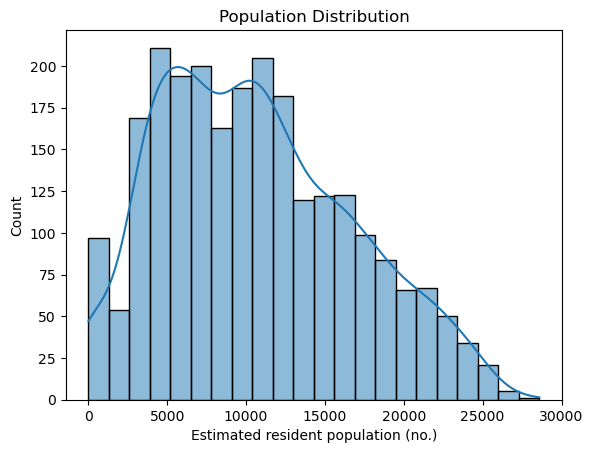

In [6]:
sns.histplot(df['Estimated resident population (no.)'], kde=True)
plt.title('Population Distribution')
plt.show()


The histogram shows that most regions have populations concentrated between 5,000 and 15,000 residents. This indicates a skew towards smaller populations with fewer regions having very high populations.


### Median Household Income Distribution

The distribution of median household income provides insights into the income levels across different regions.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


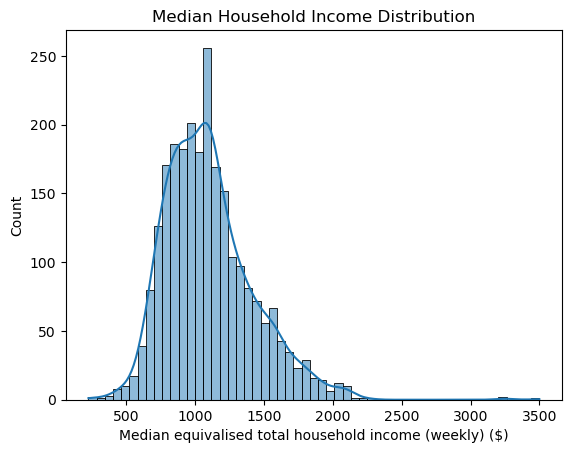

In [7]:
sns.histplot(df['Median equivalised total household income (weekly) ($)'], kde=True)
plt.title('Median Household Income Distribution')
plt.show()


The histogram shows that the majority of regions have a median household income between $500 and $1,500 weekly. There is a peak around $1,000, indicating that many regions fall around this income level. The distribution also has a long tail, suggesting some regions have much higher median incomes.


## Bivariate Analysis

### Urbanization Rate vs. Median Household Income

This scatter plot examines the relationship between urbanization rate and median household income.


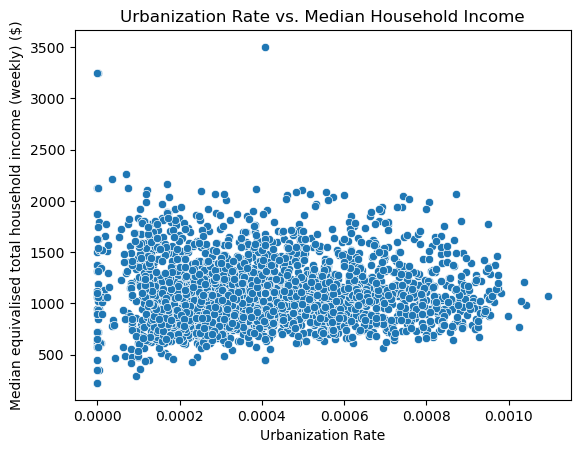

In [8]:
sns.scatterplot(x='Urbanization Rate', y='Median equivalised total household income (weekly) ($)', data=df)
plt.title('Urbanization Rate vs. Median Household Income')
plt.show()


The scatter plot shows no strong linear relationship between urbanization rate and median household income. However, there is a slight upward trend, indicating that areas with higher urbanization rates tend to have higher median household incomes.


## Multivariate Analysis

This pair plot investigates how urbanization rate, income, and population are interrelated.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

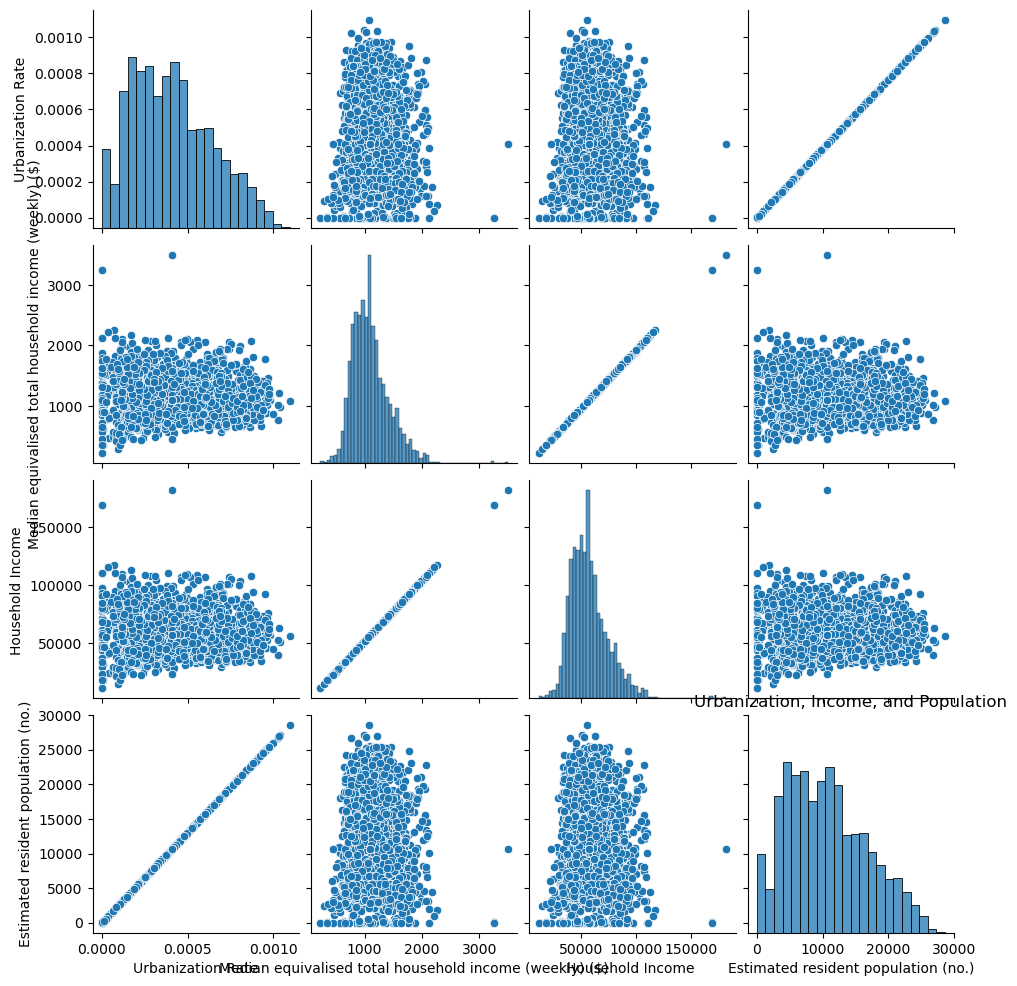

In [11]:
sns.pairplot(df, vars=['Urbanization Rate', 'Median equivalised total household income (weekly) ($)', 'Household Income ', 'Estimated resident population (no.)'])
plt.title('Urbanization, Income, and Population')
plt.show()


The pair plot allows us to visualize relationships between multiple variables simultaneously. The diagonal plots show the distribution of each variable, while the off-diagonal plots show scatter plots between pairs of variables. The slight positive trends in the off-diagonal plots suggest that higher urbanization rates are associated with higher median household incomes and household incomes. The scatter plots also indicate that higher populations are generally associated with higher urbanization rates.


## Hypothesis Testing

### Urbanization and Median Household Income

We conduct a T-test to compare the median household incomes between high and low urbanization areas.

**Results:**
- T-test Income: t_stat = 3.499712166875045, p_val = 0.000473962540748967


In [12]:
urban_high = df[df['Urbanization Rate'] > df['Urbanization Rate'].median()]
urban_low = df[df['Urbanization Rate'] <= df['Urbanization Rate'].median()]

# T-test for median household income
t_stat_income, p_val_income = stats.ttest_ind(urban_high['Median equivalised total household income (weekly) ($)'], urban_low['Median equivalised total household income (weekly) ($)'])
print(f'T-test Income: t_stat = {t_stat_income}, p_val = {p_val_income}')


T-test Income: t_stat = 3.4997912166075045, p_val = 0.0004739265470748967


The T-test results show a statistically significant difference between the median household incomes of high and low urbanization areas (p-value < 0.05). This suggests that higher urbanization rates are associated with higher median household incomes.


### Urbanization and Household Income

We conduct a T-test to compare the household incomes between high and low urbanization areas.

**Results:**
- T-test Household Income: t_stat = 3.499712166875165, p_val = 0.0004739625407484749


In [14]:
# T-test for household income
t_stat_household_income, p_val_household_income = stats.ttest_ind(urban_high['Household Income '], urban_low['Household Income '])
print(f'T-test Household Income: t_stat = {t_stat_household_income}, p_val = {p_val_household_income}')


T-test Household Income: t_stat = 3.4997912166075165, p_val = 0.0004739265470748749


The T-test results show a statistically significant difference between the household incomes of high and low urbanization areas (p-value < 0.05). This indicates that higher urbanization rates are associated with higher household incomes.


## Conclusion

In this analysis, we explored the relationship between urbanization and income levels using the ABS housing and income dataset. The results indicate that areas with higher urbanization rates tend to have higher median household incomes. This suggests a positive correlation between urbanization and income, which policymakers and businesses can leverage to make informed decisions.

### Key Findings:
1. **Population Distribution:** Most regions have populations concentrated between 5,000 and 15,000 residents.
2. **Income Distribution:** The majority of regions have a median household income between $500 and $1,500 weekly.
3. **Urbanization and Income:** Higher urbanization rates are associated with higher median household incomes and household incomes.

### Recommendations:
- **Policymakers:** Should focus on strategies to balance urbanization with housing affordability to ensure equitable living standards across regions.
- **Businesses:** Can tailor their market strategies based on the insights gained from the relationship between urbanization and income levels.

This analysis provides a foundation for further exploration into how other factors such as education and employment interact with urbanization and income levels.
